In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

### Logistic Activation function

In [2]:
x = torch.linspace(-5,5,100)
y = torch.sigmoid(x)

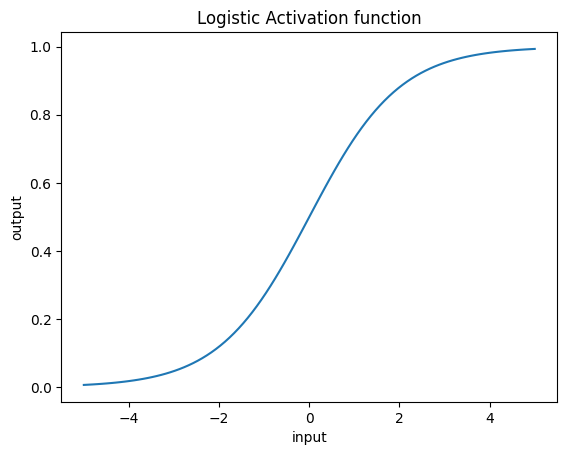

In [3]:
plt.plot(x, y)
plt.xlabel('input')
plt.ylabel('output')
plt.title('Logistic Activation function')
plt.show()

#### comment : all outputs stay between 0 and 1
##### which can be interpreted as a probability. This makes it particularly useful for binary classification tasks, where the network needs to predict the probability of an input belonging to one of two classes.

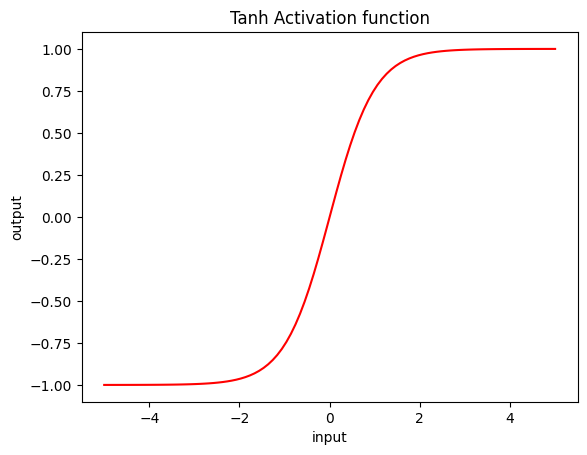

In [4]:
##Applying tanh activation function
y = torch.tanh(x)

plt.plot(x, y, color='red')
plt.xlabel('input')
plt.ylabel('output')
plt.title('Tanh Activation function')
plt.show()

#### comment : utputs values between -1 and 1, with a mean output of 0.

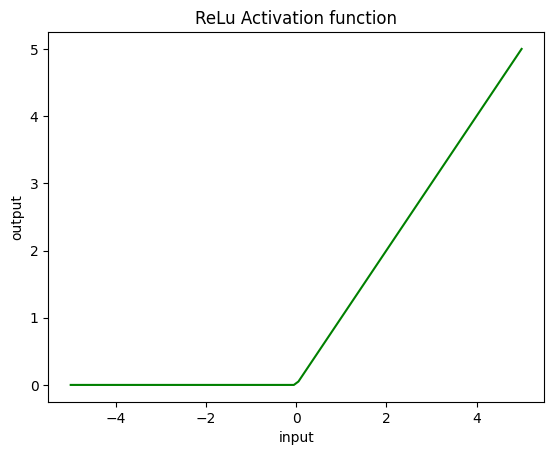

In [5]:
##Applying relu activation function
y = torch.relu(x)

plt.plot(x, y, color='green')
plt.xlabel('input')
plt.ylabel('output')
plt.title('ReLu Activation function')
plt.show()

#### comment : Unlike the sigmoid and tanh functions, ReLU is a non-saturating function, which means that it does not become flat at the extremes of the input range. Instead, ReLU simply outputs the input value if it is positive, or 0 if it is negative.

In [6]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Load the MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.MNIST(root='data/', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data/', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [7]:
class testNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, activation_func):
        super(testNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, num_classes)
        self.activation_func = activation_func

    def forward(self, x):
        x = self.activation_func(self.layer1(x))
        x = self.activation_func(self.layer2(x))
        x = self.layer3(x)
        return x

In [15]:
def train(network, data_loader, criterion, optimizer, device):
    network.train()
    running_loss = 0.0

    for data, target in data_loader:
        data, target = data.to(device), target.to(device)
        data = data.view(data.shape[0], -1)

        optimizer.zero_grad()
        output = network(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * data.size(0)

    return running_loss / len(data_loader.dataset)

def test(network, data_loader, criterion, device):
    network.eval()
    correct = 0
    total = 0
    test_loss = 0.0

    with torch.no_grad():
        for data, target in data_loader:
            data, target = data.to(device), target.to(device)
            data = data.view(data.shape[0], -1)

            output = network(data)
            loss = criterion(output, target)
            test_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    return test_loss / len(data_loader.dataset), 100 * correct / total

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = 784
hidden_size = 128
num_classes = 10
num_epochs = 10
learning_rate = 0.001

activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU()
}

results = {}

# Train and test the model with different activation functions
for name, activation_function in activation_functions.items():
    print(f"Training with {name} activation function...")

    model = testNetwork(input_size, hidden_size, num_classes, activation_function).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_loss_history = []
    test_loss_history = []
    test_accuracy_history = []

    for epoch in range(num_epochs):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        test_loss, test_accuracy = test(model, test_loader, criterion, device)

        train_loss_history.append(train_loss)
        test_loss_history.append(test_loss)
        test_accuracy_history.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    results[name] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_accuracy_history': test_accuracy_history
    }

Training with ReLU activation function...
Epoch [1/10], Test Loss: 0.1490, Test Accuracy: 95.67%
Epoch [2/10], Test Loss: 0.1017, Test Accuracy: 96.86%
Epoch [3/10], Test Loss: 0.0981, Test Accuracy: 96.85%
Epoch [4/10], Test Loss: 0.0793, Test Accuracy: 97.51%
Epoch [5/10], Test Loss: 0.0806, Test Accuracy: 97.53%
Epoch [6/10], Test Loss: 0.0861, Test Accuracy: 97.42%
Epoch [7/10], Test Loss: 0.0796, Test Accuracy: 97.55%
Epoch [8/10], Test Loss: 0.0852, Test Accuracy: 97.50%
Epoch [9/10], Test Loss: 0.0817, Test Accuracy: 97.73%
Epoch [10/10], Test Loss: 0.0926, Test Accuracy: 97.79%
Training with Sigmoid activation function...
Epoch [1/10], Test Loss: 0.2655, Test Accuracy: 91.85%
Epoch [2/10], Test Loss: 0.1697, Test Accuracy: 94.69%
Epoch [3/10], Test Loss: 0.1414, Test Accuracy: 95.75%
Epoch [4/10], Test Loss: 0.1135, Test Accuracy: 96.57%
Epoch [5/10], Test Loss: 0.0998, Test Accuracy: 96.91%
Epoch [6/10], Test Loss: 0.0935, Test Accuracy: 97.17%
Epoch [7/10], Test Loss: 0.0831,

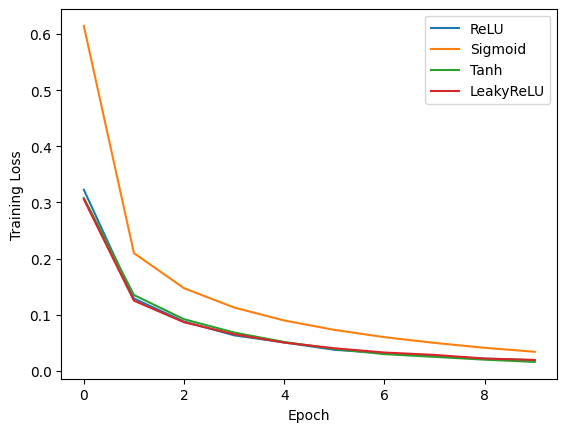

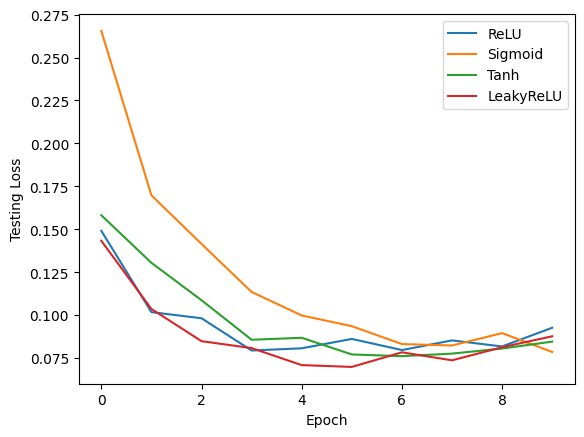

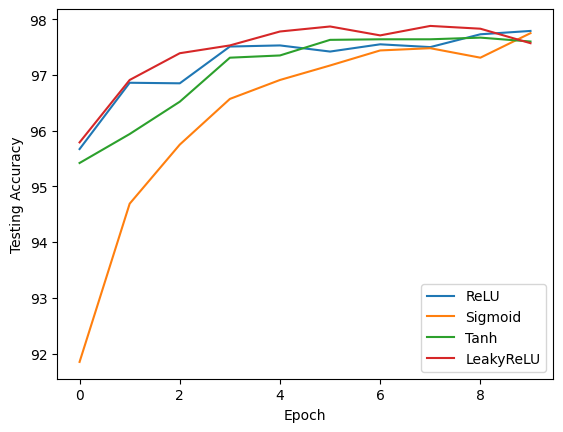

In [19]:
# Plot the training loss
plt.figure()
for name, data in results.items():
    plt.plot(data['train_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

# Plot the testing loss
plt.figure()
for name, data in results.items():
    plt.plot(data['test_loss_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Loss')
plt.legend()
plt.show()

# Plot the testing accuracy
plt.figure()
for name, data in results.items():
    plt.plot(data['test_accuracy_history'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Testing Accuracy')
plt.legend()
plt.show()